# Assignment: Linear Models
## Do three questions.
### `! git clone https://github.com/ds4e/linearModels`

**Q1.** Please answer the following questions in your own words.

1. What makes a model "linear"? "Linear" in what?
2. How do you interpret the coefficient for a dummy/one-hot-encoded variable? (This is a trick question, and the trick involves how you handle the intercept of the model.)
3. Can linear regression be used for classification? Explain why, or why not.
4. What are signs that your linear model is over-fitting?
5. Clearly explain multi-colinearity using the two-stage least squares technique.
6. How can you incorporate nonlinear relationships between your target/response/dependent/outcome variable $y$ and your features/control/response/independent variables $x$ into your analysis?
7. What is the interpretation of the intercept? A slope coefficient for a variable? The coefficient for a dummy/one-hot-encoded variable?

1. The model is linear in how the coefficients are linear. This means each term is a constant or a parameter that's mulitplied by another variable. For example, the betas in y = beta_0 + beta_1_x are linear, which makes the model linear.
2. It depends on if you include the intercept or not. If you include the intercept, the coefficient for the dummy variable is the difference in the mean of category 1 and category 0. If you don't include the intercept, then the dummy variable is the mean outcome of that group.
3. Yes you can use it for classification to predict the probablities for binary problems.
4. It's overfitting if there's a low training error but a high test error, which means it performs well on the training data but bad on new data.
5. Multicollinearity is when 2 independent variables are very related, making it hard to determine which variable is affecting the outcome. Two-stage least squares helps determine which of your independent variables is biased by taking the suspected variable and trying to predict it using other variables related to it but not to the error. Then plug the newly predicted variable back into the regression, which eliminates the bias.
6. You can add polynomial terms like x^2 and log or exponential transformations. As long as the coefficients are still linear, the model is still linear.
7. The intercept is the y value (target) when the x = 0. The slope is the rate of change when the x increases by 1. The coefficient for a dummy variable is based on whether you include the intercept. Including the intercept means it's the difference in the mean of category 1 and category 0. Excluding the intercept means it's the mean outcome of that group.

**Q2.** Load `./data/Q1_clean.csv`. The data include

- `Price` per night
- `Review Scores Rating`: The average rating for the property
- `Neighbourhood `: The bourough of NYC. Note the space, or rename the variable.
- `Property Type`: The kind of dwelling
- `Room Type`: The kind of space being rented

1. Compute the average prices and scores by `Neighbourhood `; which bourough is the most expensive on average? Create a kernel density plot of price and log price, grouping by `Neighbourhood `.
2. Regress price on `Neighbourhood ` by creating the appropriate dummy/one-hot-encoded variables, without an intercept in the linear model and using all the data. Compare the coefficients in the regression to the table from part 1. What pattern do you see? What are the coefficients in a regression of a continuous variable on one categorical variable?
3. Repeat part 2, but leave an intercept in the linear model. How do you have to handle the creation of the dummies differently? What is the intercept? Interpret the coefficients. How can I get the coefficients in part 2 from these new coefficients?
4. Split the sample 80/20 into a training and a test set. Run a regression of `Price` on `Review Scores Rating` and `Neighbourhood `. What is the $R^2$ and RMSE on the test set? What is the coefficient on `Review Scores Rating`? What is the most expensive kind of property you can rent?
5. Split the sample 80/20 into a training and a test set. Run a regression of `Price` on `Review Scores Rating` and `Neighbourhood ` and `Property Type`. What is the $R^2$ and RMSE on the test set? What is the coefficient on `Review Scores Rating`? What is the most expensive kind of property you can rent?
6. What does the coefficient on `Review Scores Rating` mean if it changes from part 4 to 5? Hint: Think about how multilple linear regression works.
7. (Optional) We've included `Neighborhood ` and `Property Type` separately in the model. How do you interact them, so you can have "A bedroom in Queens" or "A townhouse in Manhattan". Split the sample 80/20 into a training and a test set and run a regression including that kind of "property type X neighborhood" dummy, plus `Review Scores Rating`. How does the slope coefficient for `Review Scores Rating`, the $R^2$, and the RMSE change? Do they increase significantly compares to part 5? Are the coefficients in this regression just the sum of the coefficients for `Neighbourhood ` and `Property Type` from 5? What is the most expensive kind of property you can rent?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

df = pd.read_csv('./data/Q1_clean.csv')
# df = pd.read_csv('Q1_clean.csv')
df.rename(columns={'Neighbourhood ': 'Neighbourhood'}, inplace=True)
df.head()

,Price,Review Scores Rating,Neighbourhood,Property Type,Room Type
0,549,96.0,Manhattan,Apartment,Private room
1,149,100.0,Brooklyn,Apartment,Entire home/apt
2,250,100.0,Manhattan,Apartment,Entire home/apt
3,90,94.0,Brooklyn,Apartment,Private room
4,270,90.0,Manhattan,Apartment,Entire home/apt


Average Price and Rating by Neighbourhood:
                    Price  Review Scores Rating
Neighbourhood                                  
Bronx           75.276498             91.654378
Brooklyn       127.747378             92.363497
Manhattan      183.664286             91.801496
Queens          96.857233             91.549057
Staten Island  146.166667             90.843750
Most expensive borough: Manhattan


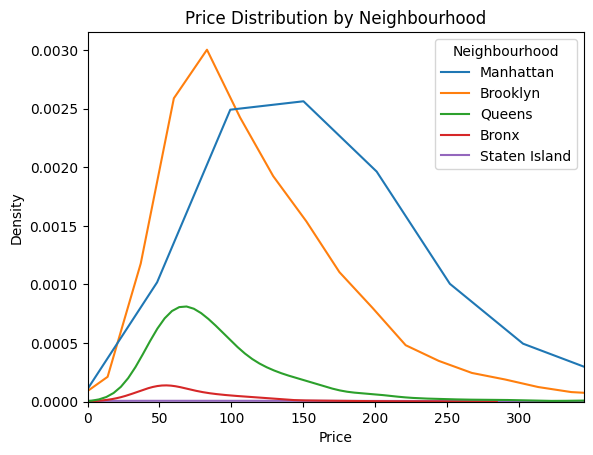

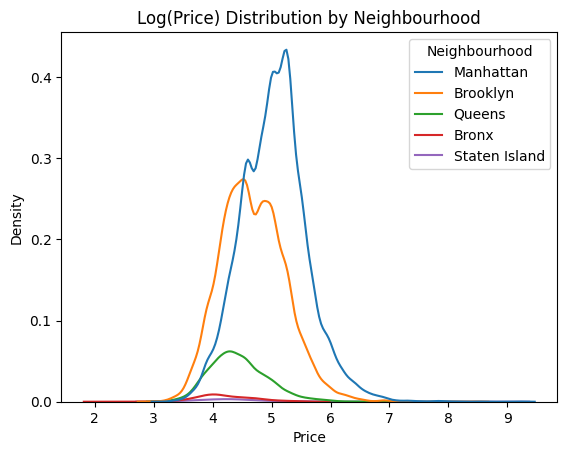

In [2]:
avg_stats = df.groupby('Neighbourhood')[['Price', 'Review Scores Rating']].mean()
print("Average Price and Rating by Neighbourhood:")
print(avg_stats)

most_expensive = avg_stats['Price'].idxmax()
print(f"Most expensive borough: {most_expensive}")

sns.kdeplot(data=df, x='Price', hue='Neighbourhood')
plt.title("Price Distribution by Neighbourhood")
plt.xlim(0, df['Price'].quantile(0.95))
plt.show()

sns.kdeplot(data=df, x=np.log(df['Price']), hue='Neighbourhood')
plt.title("Log(Price) Distribution by Neighbourhood")
plt.show()



In [3]:
X = pd.get_dummies(df['Neighbourhood'], drop_first=False)
y = df['Price']

model = LinearRegression(fit_intercept=False)
model.fit(X, y)

results = pd.DataFrame({'variable':model.feature_names_in_, 'coefficient': model.coef_})
print(results)

        variable  coefficient
0          Bronx    75.276498
1       Brooklyn   127.747378
2      Manhattan   183.664286
3         Queens    96.857233
4  Staten Island   146.166667


The coefficients are the same as the average price from part 1. The coefficients on the dummy variables are the same as the group means of the continous variable.


In [4]:
X = pd.get_dummies(df['Neighbourhood'], drop_first=True)
y = df['Price']

model = LinearRegression()
model.fit(X, y)

intercept = model.intercept_
print(intercept)
results = pd.DataFrame({'variable':model.feature_names_in_, 'coefficient': model.coef_})
print(results)

results2 = results['coefficient'] + intercept
print(results2)

75.27649769585331
        variable  coefficient
0       Brooklyn    52.470881
1      Manhattan   108.387789
2         Queens    21.580735
3  Staten Island    70.890169
0    127.747378
1    183.664286
2     96.857233
3    146.166667
Name: coefficient, dtype: float64


When creating the dummies, you drop the first category, which is Bronx in this case, and keep the intercept. The intercept is 75, which is the average price of Bronx. The coefficients are how much more or less expensive that neighborhood is compared to Bronx. To get the coefficients from part 2, you add the intercept + coefficients from part 3.

In [5]:
X = pd.get_dummies(df[['Review Scores Rating', 'Neighbourhood']], drop_first=False)
y = df['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression(fit_intercept=False)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

rss = np.sum((y_test - y_pred) ** 2)
tss = np.sum((y_test - np.mean(y_test)) ** 2)
r2 = 1 - rss / tss
rmse = np.sqrt(rss / len(y_test))

print(f"R²: {r2}, RMSE: {rmse}")

results = pd.DataFrame({'variable':model.feature_names_in_, 'coefficient': model.coef_})
print(results)

R²: 0.04592588381735074, RMSE: 140.91821103729345
                      variable  coefficient
0         Review Scores Rating     1.211852
1          Neighbourhood_Bronx   -35.157344
2       Neighbourhood_Brooklyn    16.398626
3      Neighbourhood_Manhattan    72.256209
4         Neighbourhood_Queens   -14.958771
5  Neighbourhood_Staten Island   -11.702672


R^2 = 0.046 and RMSE = 140.92. The coefficient of review scores rating is 1.21. The most expensive property is Manhatten.

In [6]:
X = pd.get_dummies(df[['Review Scores Rating', 'Neighbourhood', 'Property Type']], drop_first=False)
y = df['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression(fit_intercept=False)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

rss = np.sum((y_test - y_pred) ** 2)
tss = np.sum((y_test - np.mean(y_test)) ** 2)
r2 = 1 - rss / tss
rmse = np.sqrt(rss / len(y_test))

print(f"R²: {r2}, RMSE: {rmse}")

results = pd.DataFrame({'variable':model.feature_names_in_, 'coefficient': model.coef_})
print(results)

R²: 0.054242713551245436, RMSE: 140.30266238276283
                         variable  coefficient
0            Review Scores Rating     1.201011
1             Neighbourhood_Bronx   -45.472200
2          Neighbourhood_Brooklyn    14.161503
3         Neighbourhood_Manhattan    75.533321
4            Neighbourhood_Queens   -18.641583
5     Neighbourhood_Staten Island   -29.771226
6         Property Type_Apartment    -3.823838
7   Property Type_Bed & Breakfast   -32.527759
8              Property Type_Boat    43.246581
9          Property Type_Bungalow    80.148602
10            Property Type_Cabin     8.565783
11        Property Type_Camper/RV   -17.640964
12           Property Type_Castle   -45.634387
13           Property Type_Chalet   -34.061558
14      Property Type_Condominium    58.083324
15             Property Type_Dorm   -46.101597
16            Property Type_House    30.887508
17              Property Type_Hut  -138.428323
18       Property Type_Lighthouse   -95.262569
19       

R^2 = 0.054 and RMSE = 140.30. The coefficient of review scores rating is 1.20. The most expensive property is Bungalow.

If the coefficient on Review Scores Rating changes from part 4 to 5, then it means property is correlated with both review scores rating and the price.



**Q3.** This question is a case study for linear models. The data are about car prices. In particular, they include:

  - `Price`, `Color`, `Seating_Capacity`
  - `Body_Type`: crossover, hatchback, muv, sedan, suv
  - `Make`, `Make_Year`: The brand of car and year produced
  - `Mileage_Run`: The number of miles on the odometer
  - `Fuel_Type`: Diesel or gasoline/petrol
  - `Transmission`, `Transmission_Type`:  speeds and automatic/manual

  1. Load `cars_hw.csv`. These data were really dirty, and I've already cleaned them a significant amount in terms of missing values and other issues, but some issues remain (e.g. outliers, badly scaled variables that require a log or arcsinh transformation). Clean the data however you think is most appropriate.
  2. Summarize the `Price` variable and create a kernel density plot. Use `.groupby()` and `.describe()` to summarize prices by brand (`Make`). Make a grouped kernel density plot by `Make`. Which car brands are the most expensive? What do prices look like in general?
  3. Split the data into an 80% training set and a 20% testing set.
  4. Make a model where you regress price on the numeric variables alone; what is the $R^2$ and `RMSE` on the training set and test set? Make a second model where, for the categorical variables, you regress price on a model comprised of one-hot encoded regressors/features alone (you can use `pd.get_dummies()`; be careful of the dummy variable trap); what is the $R^2$ and `RMSE` on the test set? Which model performs better on the test set? Make a third model that combines all the regressors from the previous two; what is the $R^2$ and `RMSE` on the test set? Does the joint model perform better or worse, and by home much?
  5. Use the `PolynomialFeatures` function from `sklearn` to expand the set of numerical variables you're using in the regression. As you increase the degree of the expansion, how do the $R^2$ and `RMSE` change? At what point does $R^2$ go negative on the test set? For your best model with expanded features, what is the $R^2$ and `RMSE`? How does it compare to your best model from part 4?
  6. For your best model so far, determine the predicted values for the test data and plot them against the true values. Do the predicted values and true values roughly line up along the diagonal, or not? Compute the residuals/errors for the test data and create a kernel density plot. Do the residuals look roughly bell-shaped around zero? Evaluate the strengths and weaknesses of your model.

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# df = pd.read_csv('./data/cars_hw.csv')
df = pd.read_csv('cars_hw.csv')
print(df.head())
print(df.info())
print(df.describe())

df.dropna(inplace=True)

df['Price'] = np.log1p(df['Price'])
df['Mileage_Run'] = np.log1p(df['Mileage_Run'])

   Unnamed: 0        Make  Make_Year   Color  Body_Type  Mileage_Run  \
0           1  Volkswagen       2017  silver      sedan        44611   
1           2     Hyundai       2016     red  crossover        20305   
2           3       Honda       2019   white        suv        29540   
3           4     Renault       2017  bronze  hatchback        35680   
4           5     Hyundai       2017  orange  hatchback        25126   

  No_of_Owners  Seating_Capacity Fuel_Type Transmission Transmission_Type  \
0          1st                 5    diesel      7-Speed         Automatic   
1          1st                 5    petrol      5-Speed            Manual   
2          2nd                 5    petrol      5-Speed            Manual   
3          1st                 5    petrol      5-Speed            Manual   
4          1st                 5    petrol      5-Speed            Manual   

    Price  
0  657000  
1  682000  
2  793000  
3  414000  
4  515000  
<class 'pandas.core.frame.DataFr

count    976.000000
mean      13.411035
std        0.450275
min       12.144203
25%       13.072649
50%       13.409797
75%       13.691082
max       14.894261
Name: Price, dtype: float64


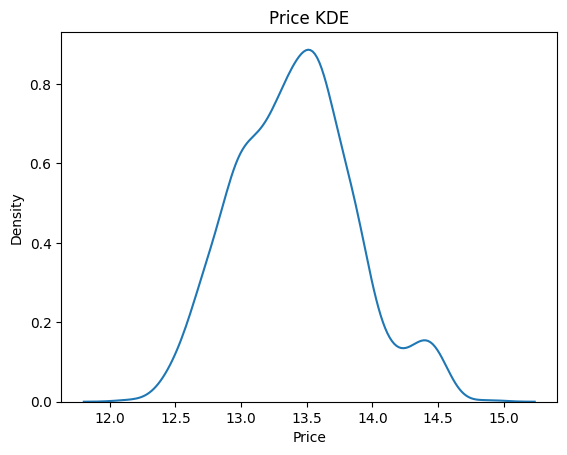

               count       mean       std        min        25%        50%  \
Make                                                                         
Chevrolet        6.0  12.919898  0.480974  12.495008  12.568395  12.752289   
Datsun           3.0  12.576050  0.036311  12.538971  12.558305  12.577640   
Ford            52.0  13.468282  0.210894  12.577640  13.361382  13.469494   
Honda           73.0  13.536319  0.336971  12.663501  13.272508  13.573440   
Hyundai        305.0  13.368512  0.398781  12.421188  13.091906  13.366095   
Jeep             4.0  14.216591  0.105084  14.070154  14.183271  14.240266   
Kia              8.0  14.292178  0.076877  14.129592  14.272242  14.303106   
MG Motors       35.0  14.439052  0.066263  14.278616  14.395745  14.429615   
Mahindra        18.0  13.898954  0.159906  13.587356  13.851809  13.905681   
Maruti Suzuki  293.0  13.218134  0.371408  12.375820  12.926351  13.174958   
Nissan           4.0  13.641195  0.392609  13.071072  13.537776 

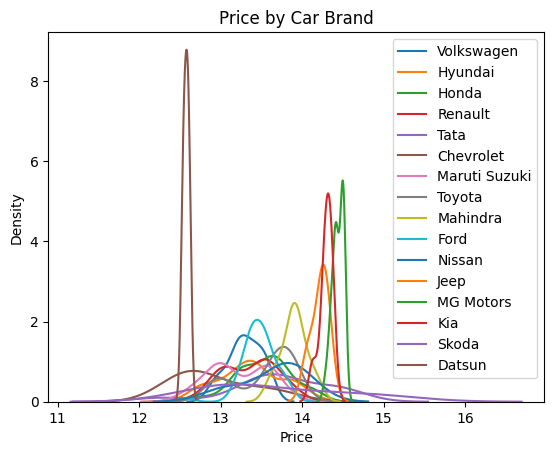

In [8]:
print(df['Price'].describe())

sns.kdeplot(df['Price'])
plt.title('Price KDE')
plt.show()

summary_by_make = df.groupby('Make')['Price'].describe()
print(summary_by_make)

top_makes = df['Make'].unique()
for make in top_makes:
    sns.kdeplot(df[df['Make'] == make]['Price'], label=make)
plt.title('Price by Car Brand')
plt.legend()
plt.show()

The most expensive car brands are Jeep, Kia, MG Motors. Price distribution is overall centered at around 13.5. The price by car brands also seem to be overall centered and following bell shape.

In [9]:
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

In [10]:
y = df['Price']
numeric_features = ['Make_Year', 'Seating_Capacity', 'Mileage_Run']

y_train = train_df['Price']
y_test = test_df['Price']

X_train_num = train_df[numeric_features]
X_test_num = test_df[numeric_features]

model_num = LinearRegression()
model_num.fit(X_train_num, y_train)
pred_train_num = model_num.predict(X_train_num)
pred_test_num = model_num.predict(X_test_num)

def rmse(y_true, y_pred):
  return np.sqrt(np.mean((y_true - y_pred)**2))

def r2(y_true, y_pred):
  tss = np.sum((y_true - np.mean(y_true))**2)
  rss = np.sum((y_true - y_pred)**2)
  return 1 - (rss / tss)

print("Numeric Model")
print("Train RMSE:", rmse(y_train, pred_train_num))
print("Test RMSE:", rmse(y_test, pred_test_num))
print("Train R^2:", r2(y_train, pred_train_num))
print("Test R^2:", r2(y_test, pred_test_num))

Numeric Model
Train RMSE: 0.34353154121383
Test RMSE: 0.3382571859337909
Train R^2: 0.4248364214387491
Test R^2: 0.400019717576812


In [11]:
categorical_features = ['Color', 'Body_Type', 'Make', 'Fuel_Type', 'Transmission', 'Transmission_Type']

X_train_cat = pd.get_dummies(train_df[categorical_features], drop_first=True)
X_test_cat = pd.get_dummies(test_df[categorical_features], drop_first=True)

X_train_cat, X_test_cat = X_train_cat.align(X_test_cat, join='left', axis=1, fill_value=0)

model_cat = LinearRegression()
model_cat.fit(X_train_cat, y_train)
pred_test_cat = model_cat.predict(X_test_cat)

print("Categorical Model")
print("Test RMSE:", rmse(y_test, pred_test_cat))
print("Test R^2:", r2(y_test, pred_test_cat))

Categorical Model
Test RMSE: 0.2566550222183944
Test R^2: 0.6545840013460564


The categorical model performed better on the test set because it has a lower RMSE and higher R^2.

In [12]:
X_train_all = pd.concat([X_train_num.reset_index(drop=True), X_train_cat.reset_index(drop=True)], axis=1)
X_test_all = pd.concat([X_test_num.reset_index(drop=True), X_test_cat.reset_index(drop=True)], axis=1)

model_all = LinearRegression()
model_all.fit(X_train_all, y_train)
pred_test_all = model_all.predict(X_test_all)

print("Joint Model")
print("Test RMSE:", rmse(y_test, pred_test_all))
print("Test R^2:", r2(y_test, pred_test_all))


Joint Model
Test RMSE: 0.18647701488450333
Test R^2: 0.8176551374466057


The joint model performs better because it has the lowest RMSE and highest R^2. The RMSE decreased by 0.07 and R^2 increased by 0.16.

In [21]:
from sklearn.preprocessing import PolynomialFeatures

def standardize(z):
  return (z - np.mean(z)) / np.std(z)

X = df[numeric_features].apply(standardize)
y = df['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

degrees = [1, 2, 3, 4, 5]
for d in degrees:
    poly = PolynomialFeatures(degree=d, include_bias=False)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)

    model = LinearRegression()
    model.fit(X_train_poly, y_train)

    y_pred_test = model.predict(X_test_poly)

    r2_score = r2(y_test, y_pred_test)
    rmse_score = rmse(y_test, y_pred_test)

    print(f"Degree {d}: R² = {r2_score}, RMSE = {rmse_score}")

Degree 1: R² = 0.40001971757680665, RMSE = 0.3382571859337924
Degree 2: R² = 0.41759621729520024, RMSE = 0.3332657138188767
Degree 3: R² = 0.40072681940371757, RMSE = 0.33805780205878727
Degree 4: R² = 0.29178818400940365, RMSE = 0.3675023551801511
Degree 5: R² = -0.05160195103369625, RMSE = 0.4478207717561335


As the degree increases, the R^2 decreases and the rmse increases. When degree = 5, R^2 goes negative. The best model is when degree = 2, R^2 = 0.42, and rmse = 0.33. It's worse than the best model from part 4.

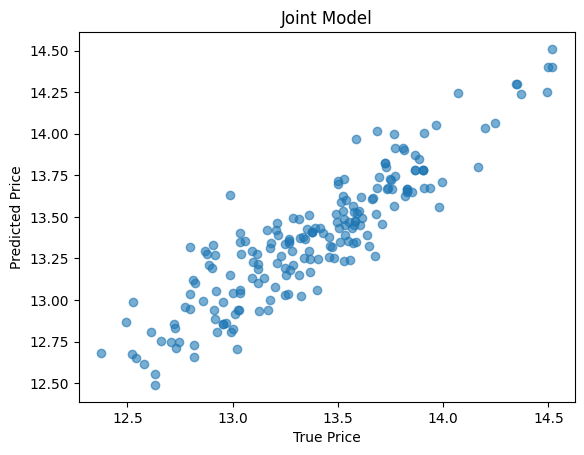

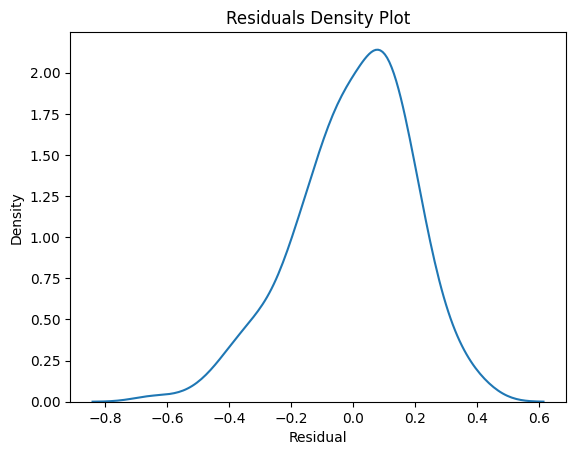

In [26]:
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)
y = df['Price']

y_train = train_df['Price']
y_test = test_df['Price']

X_train_all = pd.concat([X_train_num.reset_index(drop=True), X_train_cat.reset_index(drop=True)], axis=1)
X_test_all = pd.concat([X_test_num.reset_index(drop=True), X_test_cat.reset_index(drop=True)], axis=1)

model_all = LinearRegression()
model_all.fit(X_train_all, y_train)
pred_test_all = model_all.predict(X_test_all)

plt.scatter(y_test, pred_test_all, alpha=0.6)
plt.xlabel("True Price")
plt.ylabel("Predicted Price")
plt.title("Joint Model")
plt.show()

residuals = y_test - pred_test_all

sns.kdeplot(residuals)
plt.title("Residuals Density Plot")
plt.xlabel("Residual")
plt.show()


Yes, the predicted values and true values do roughly line up along the diagonal. Yes, the residuals look roughly bell-shaped around zero. The strenghts of my model are that it has a high predictive power from the high R^2, which means the model explains a large amount of the price variation, and it has a low test error from the low rmse, which means that it performs well on new data. The weaknesses of my model are that it could possibly overfit if there are too many dummy variables, and I didn't take into account outliers.

**Q4.** This question refers to the `heart_hw.csv` data. It contains three variables:

  - `y`: Whether the individual survived for three years, coded 0 for death and 1 for survival
  - `age`: Patient's age
  - `transplant`: `control` for not receiving a transplant and `treatment` for receiving a transplant

Since a heart transplant is a dangerous operation and even people who successfully get heart transplants might suffer later complications, we want to look at whether a group of transplant recipients tends to survive longer than a comparison group who does not get the procedure.

1. Compute (a) the proportion of people who survive in the control group who do not receive a transplant, and (b) the difference between the proportion of people who survive in the treatment group and the proportion of people who survive in the control group. In a randomized controlled trial, this is called the **average treatment effect**.
2. Regress `y` on `transplant` using a linear model with a constant. How does the constant/intercept of the regression and the coefficient on transplant compare to your answers from part 1? Explain the relationship clearly.
3. We'd like to include `age` in the regression, since it's reasonable to expect that older patients are less likely to survive an extensive surgery like a heart transplant. Regress `y` on a constant, transplant, and age. How does the intercept change?
4. Build a more flexible model that allows for non-linear age effects and interactions between age and treatment. Use a train-test split to validate your model. Estimate your best model, predict the survival probability by age, and plot your results conditional on receiving a transplant and not. Describe what you see.
5. Imagine someone suggests using these kinds of models to select who receives organ transplants; perhaps the CDC or NIH starts using a scoring algorithm to decide who is contacted about a potential organ. What are your concerns about how it is built and how it is deployed?

**Q5.** This is a question about linear regression. The outcome is whether a defendant is held pre-trial in the Virginia justice system. We would like to understand how that outcome is predicted by characteristics of the defendant, particularly race. Let's be very careful/clear: We aren't saying anyone *should* be held without bond or asserting that people with different demographic variables *should* be more likely to be held, but instead trying to predict whether people with different characteristics *are empirically more likely* to be held without bond, given the available information. This is the first step we would take in investigating whether a system is fair, or how large the disparities are: Does it treat people with similar observable characteristics similarly, or not? We are going to look at a common question: Are Black defendants treated differently from white or Asian ones? (There are Native American defendants, but there are 11 in total, which is such a small number of observations that is difficult to clearly say anything about how this group is treated relative to the others.)

The variables in the data are:

  - `held_wo_bail`: Whether a defendant is held without bail before trial (Boolean logical)
  - `race`, `sex`: Categorical demographic variables
  - `is_poor`: Whether the defendant is classified as indigent
  - `prior_F`, `prior_M`: The number of prior felony and misdemeanor arrests
  - `case_type`: A categorical variable indicating a misdemeanor `M` or felony `F` or infraction `I` or special case `S`
  - `age`: Defendant's age
  - `bond`, `bond_NA`, `bond_type`: The amount of any bond, whether it is missing, and the type
  - `sentence`, `sentence_NA`, `sentence_type`: The length of any sentence, whether it is missing, and the type

1. Load the `pretrial_data.csv` data. Notice that there are `nan`s, but the data are relatively clean. Because there are `.nan`s among variables you won't use, you'll want to narrow down your analysis to the relevant variables before dropping or imputing missing values.
2. Create a dummy variable indicating that the defendant is Black.
3. Regress `held` on `Black`. What is the slope coefficient Interpret the coefficient on the Black dummy variable: How much more likely is a black person to be held without bail? What is the $R^2$ of the model?
4. Before doing this question, please think for a few minutes about how to make the process of running the following regressions as efficient as possible, before jumping into writing code. Repeat part 2, for the following specifications, keeping track of the coefficient on the Black dummy variable each time:
      - `held` on `Black` and `sex`
      - `held` on `Black` and `sex` and `is_poor`
      - `held` on `Black` and `sex` and `is_poor` and `prior_F`
      - `held` on `Black` and `sex` and `is_poor` and `prior_F` and `case_type`
What happens to the coefficient on the Black dummy variable as you include more regressors/features/controls in the regression? Explain your findings.
5. Suppose we don't want to see just `Black` and `sex`, but `Black` interacted with `sex`: Are Black men and Black women treated systemically differently from the rest of the population? Implement this in a regression, and explain your findings.
6. Imagine someone argued we should use these kinds of models to help a judge or magistrate make bail decisions (you could obviously go back and make this kind of model for the bond and sentence variables, then deploy it on new cases to predict what their bond and sentence values would be). What concerns would you have? Do you think society should be using data-driven and automated tools like that? Explain your concerns clearly.

**Q6.** Let's explore multiple linear regression in a two-variable case, to build more intuition about what is happening.

Suppose the model is
$$
\hat{y}_i = b_0 + b_1 z_{i1} + b_2 z_{i2}
$$
Assume that $z_{ij}$ is centered or de-meaned, so that $z_{ij} = x_{ij} - m_j$ where $m_j$ is the mean of variable $j$ and $x_{ij}$ is the original value of variable $j$ for observation $i$. Notice that this implies
$$
\dfrac{1}{N} \sum_{i=1}^N z_{ij} = 0
$$
which will simplify your calculations below substantially!

1. Write down the SSE for this model.
2. Take partial derivatives with respect to $b_0$, $b_1$, and $b_2$.
3. Verify that the average error is zero and $e \cdot z =0$ at the optimum, just as in the single linear regression case.
4. Show that the optimal intercept is $b_0^* = \bar{y}$. Eliminate $b_0^*$ from the remaining equations, and focus on $b_1$ and $b_2$.
5. Write your results as a matrix equation in the form "$Ab=C$". These are called the **normal equations**.
6. Divide both sides by $N$ and substitute $z_{ij} = x_{ij} - m_j$ back into your normal equations for $x_{ij}$. What is the matrix $A$? What is the vector $C$? Explain the intuition of your discovery.

**Q7.** In class, we showed that for the single linear regression model,
\begin{alignat*}{3}
a^* &=& \bar{y} \\
b^* &=& \dfrac{\sum_{i=1}^N(y_i - \bar{y})(x_i-\bar{x})}{\sum_{i=1}^N (x_i-\bar{x})^2},
\end{alignat*}

1. When will $b^*$ be large or small, depending on the relationship between $X$ and $Y$ and the variance of $X$?
2. Suppose you have measurement error in $X$ which artificially inflates its variance (e.g. bad data cleaning). We'll model this as saying the "real" value of $X$ for observation $i$ is $z_i$, but we observe $x_i = z_i + n_i$, where $n_i$ is the added noise. Does this affect the intercept of the regression? What happens to the $b^*$ coefficient relative to a noise-less model? How will affect your ability to predict? (This phenomenon is called **attenuation**.)
3. Suppose the noise $n_i$ is independent of $z_i$ and $y_i$, so that (approximately)
$$
\dfrac{1}{N} \sum_{i=1}^N (y_i - \bar{y})(n_i - \bar{n}) =0, \quad \dfrac{1}{N} \sum_{i=1}^N (z_i - \bar{z})(n_i - \bar{n}) =0.
$$
and that the mean of the bias is zero, so that
$$
\dfrac{1}{N} \sum_{i=1}^N n_i = 0.
$$
In this case, the noise $n_i$ is zero on average and independent of the values of $x_i$ and $y_i$: It's just measurement error or lazy data cleaning.
Explain the intuition of your result.

4. How does attenuation factor into the cost-benefit analysis of gathering higher quality data or cleaning it more carefully?

**Q8.**
1. Find a dataset on a topic you're interested in. Some easy options are data.gov, kaggle.com, and data.world.
2. Clean the data and do some exploratory data analysis on key variables that interest you. Pick a particular target/outcome variable and features/predictors.
3. Split the sample into an ~80% training set and a ~20% test set.
4. Run a few regressions of your target/outcome variable on a variety of features/predictors. Compute the SSE on the test set.
5. Which model performed the best, and why?
6. What did you learn?

**Q9.** There is a folder called `heart_failure` which contains reasonably detailed health data on patients and whether they die of congestive heart failure.

1. Load the data and perform an 80/20-train/test split.
2. Using dummy/one-hot-encoded variables and transformations of the numeric features, build the best model you can. **But**, do not delete code chunks or revise your work substantially as you experiment. Just keep moving forward with your ideas and experiments.
3. When you're done, scroll through your notebook. What worked and what didn't? Does your code have intention, or are you randomly experimenting? If you had to do this again, what might you do differently to get to a good model faster?


**Q10.** Let's look at a cousin of Linear Regression, called **kernel regression** or **local constant least squares** or **Nadaraya-Watson Estimator**.

We derived the OLS estimator for single linear regression by minimizing
$$
SSE(b_0, b_1) = \frac{1}{N}\sum_{i=1}^N (y_i - b_0 - b_1 x_i)^2
$$
with solution
$$
\hat{b}_0 = \bar{y} - \hat{b}_1 \bar{x}, \quad \hat{b}_1 = \dfrac{\frac{1}{N} \sum_{i=1}^N (x_i-\bar{x})(y_i - \bar{y})}{s_x^2}.
$$

When you step back and think about it, this is a bit weird: The algorithm is computing sample means, variances, and covariances, and using those to create a predictive model. The data themselves arguably vanish from the solution. This is elegant, this is strange.

Instead, let $k(z)$ be a kernel function, such as the Gaussian
$$
k(z) = \frac{1}{\sqrt{2\pi}} e^{-z^2/2}
$$
or uniform
$$
k(z) = \begin{cases}
1/2, & |z| \le \frac{1}{2}\\
0, & \text{otherwise.}
\end{cases}
$$
We'll instead minimize, or each predictor value $x$,
$$
SSE(\hat{y}(x)) = \dfrac{1}{N} \sum_{i=1}^N \left\lbrace y_i - \hat{y}(x)\right\rbrace^2 \dfrac{1}{h} k \left( \dfrac{x-x_i}{h} \right).
$$

1. Show that the optimal predictor is
$$
\hat{y}(x) = \dfrac{ \frac{1}{Nh} \sum_{i=1}^N  y_i k \left( \dfrac{x-x_i}{h} \right) }{\frac{1}{Nh} \sum_{i=1}^N k \left(  \dfrac{x-x_i}{h} \right)}
$$
This has many names, but let's call it the local constant least squares (LCLS) estimator, as opposed to ordinary least squares (OLS).

2. Compare and contrast LCLS with both OLS and $k$-Nearest Neighbor as a regression algorithm.

3. Write a function or class that implements the LCLS estimator for a single predictor variable $x$. For a default bandwidth $h$, you can use the maximum of the Silverman plug-ins for estimating kernel densities for $X$ and $Y$:
$$
h_y = 1.06 \times s_y^{-1/5}, \quad h_x = 1.06 \times s_x^{-1/5},
$$
$$
h = \max \{ h_y, h_x \}.
$$
For the kernel, you can hard-code the uniform, Gaussian, or Epanechnikov, or make it a parameter the user can adjust with a default choice.

4. For one of the datasets available for the homework, use your LCLS estimator from part 3 to predict values $\hat{y}(x_i)$ for each datapoint $x_i$. Plot your estimator $\hat{y}$ as a line over a scatterplot of the data $\{(x_i,y_i)\}_{i=1}^N$. Tune the bandwidth until you

5. Conceptually, how would you extend this analysis to a vector of predictors, $x = (x_1, ..., x_L)$ instead of just one explanatory variable $x$?
